In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
import palettable

from astropy.table import Table
import astropy.units as u
import astropy.constants as c
import astropy.coordinates as coords

In [2]:
plt.rc('figure', dpi=120, figsize=(4,3))

In [3]:
from scipy.integrate import quad

In [4]:
def kroupa_imf(m):
    if m>=0.5:
        return m**-2.3
    elif (0.08<m) & (m<0.5):
        return 2*m**-1.3
    else:
        return 2*0.08**-1 * m**-0.3

In [5]:
def kroupa_number(m1, m2):
    return quad(kroupa_imf, m1, m2)[0]

In [6]:
def kroupa_mass(m1, m2):
    return quad(lambda x: kroupa_imf(x)*x, m1, m2)[0]

In [7]:
ms = np.logspace(-2,1,101)
imfs = list(map(kroupa_imf, ms))

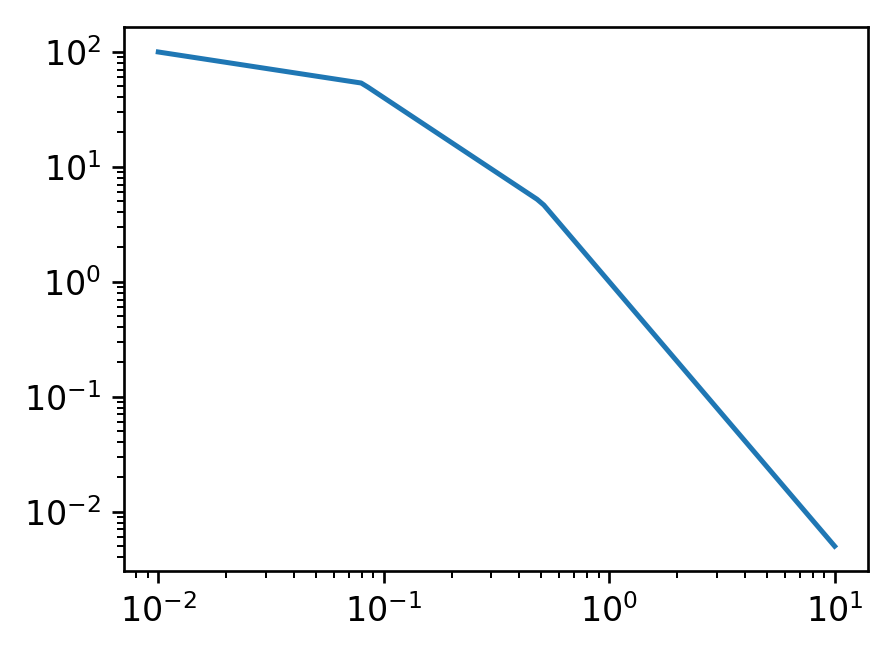

In [8]:
plt.plot(ms, imfs)
plt.xscale('log')
plt.yscale('log')

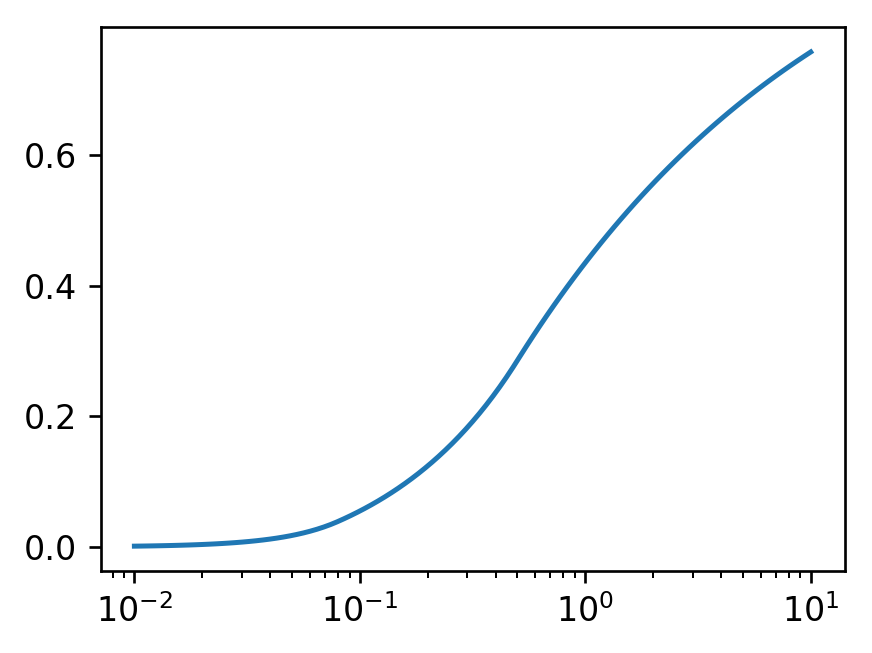

In [9]:
norm = kroupa_mass(0.001, 1000)
cum = np.array(list(map(lambda x: kroupa_mass(0.001, x), ms))) / norm
plt.plot(ms, cum);
plt.xscale('log');

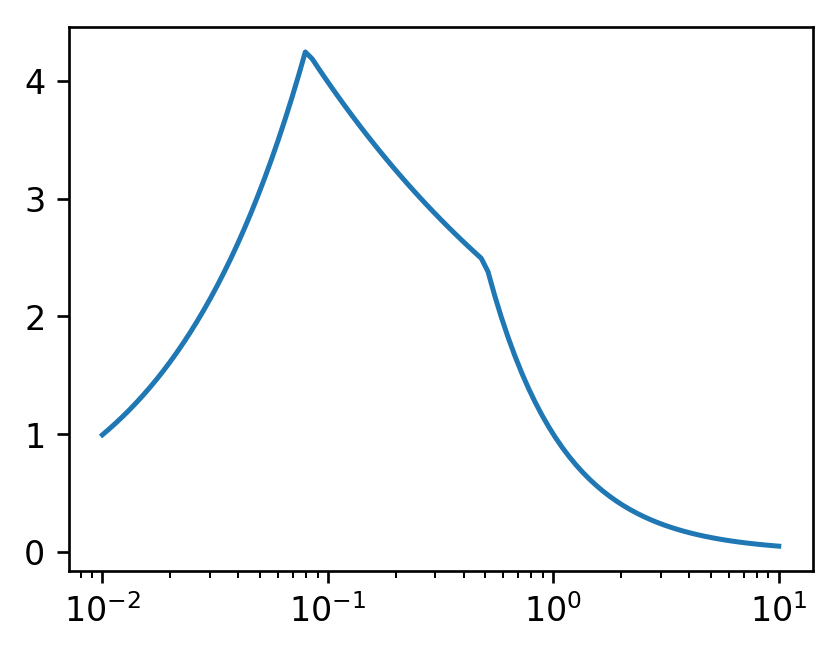

In [10]:
deltamass = np.array(list(map(lambda x: kroupa_imf(x)*x, ms)))
plt.plot(ms, deltamass)
plt.xscale('log');

In [11]:
kroupa_mass(0.001, 1000), kroupa_mass(0.24, 1000)

(5.155989659320141, 4.390795394448682)

In [12]:
kroupa_mass(0.001, 1000)/kroupa_mass(0.24, 2.1)

2.4067873876864034